In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
from PIL import Image

In [3]:
image_path ='/content/6_256.jpg'
image = Image.open(image_path)

In [4]:
def PCA_Compression_and_Reconstructuion(image_path, number_of_components):
    image = Image.open(image_path)
    numpydata = np.asarray(image)
    orignal_shape = numpydata.shape
    compression = np.zeros((orignal_shape[0], number_of_components, orignal_shape[2]))
    
    pca0 = PCA(number_of_components)
    compression[:,:,0] = pca0.fit_transform(numpydata[:,:,0]/255)
    pca1 = PCA(number_of_components)
    compression[:,:,1] = pca1.fit_transform(numpydata[:,:,1]/255)
    pca2 = PCA(number_of_components)
    compression[:,:,2] = pca2.fit_transform(numpydata[:,:,2]/255)
        
    
    reconstructuion = np.zeros(orignal_shape)
    
    reconstructuion[:,:,0] = pca0.inverse_transform(compression[:,:,0])
    reconstructuion[:,:,1] = pca1.inverse_transform(compression[:,:,1])
    reconstructuion[:,:,2] = pca2.inverse_transform(compression[:,:,2])
            
    return reconstructuion, compression

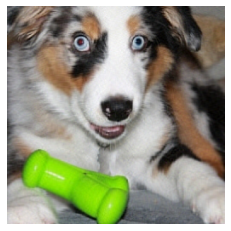

In [5]:
path = "/content/6_256.jpg"
recon, _ = PCA_Compression_and_Reconstructuion(image_path=path, number_of_components=64)
recon = np.clip(recon, 0.0, 1.0)
plt.axis('off')
plt.imshow(recon)
plt.show()

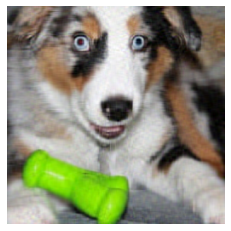

In [6]:
recon, _ = PCA_Compression_and_Reconstructuion(image_path=path, number_of_components=32)
recon = np.clip(recon, 0.0, 1.0)
plt.axis('off')
plt.imshow(recon)
plt.show()

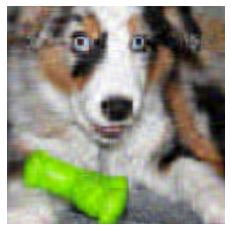

In [7]:
recon, _ = PCA_Compression_and_Reconstructuion(image_path=path, number_of_components=16)
recon = np.clip(recon, 0.0, 1.0)
plt.axis('off')
plt.imshow(recon)
plt.show()

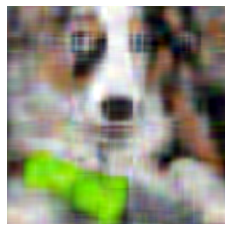

In [8]:
recon, _ = PCA_Compression_and_Reconstructuion(image_path=path, number_of_components=8)
recon = np.clip(recon, 0.0, 1.0)
plt.axis('off')
plt.imshow(recon)
plt.show()